First 5 rows:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Dataset shape: (768, 9)

Basic statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.36957

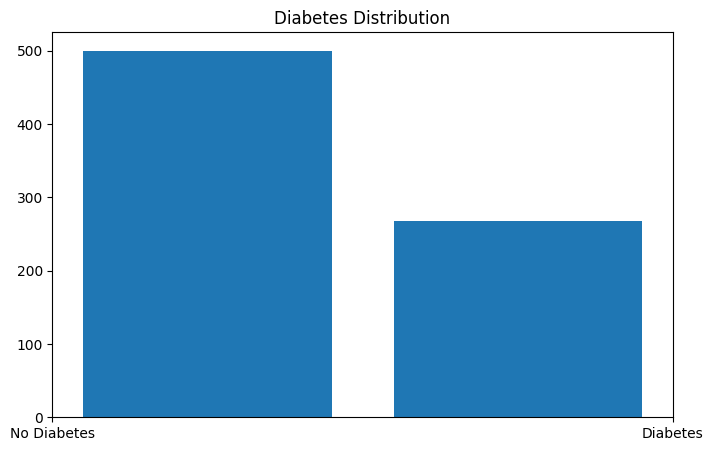


Model Accuracy: 76.62%

Confusion Matrix:
[[82 17]
 [19 36]]


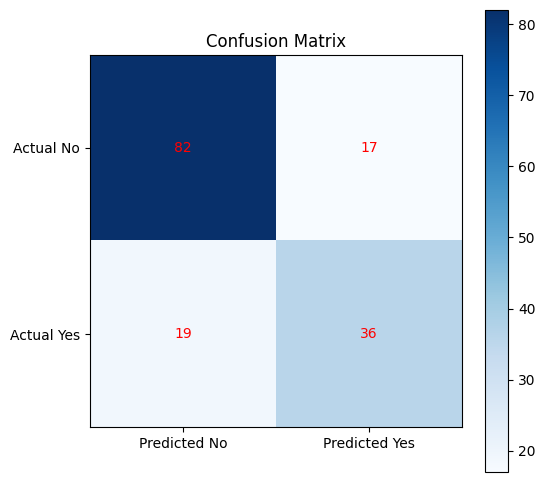


Feature Importance:
                    Feature  Importance
1                   Glucose    1.138214
5                       BMI    0.718367
7                       Age    0.378817
0               Pregnancies    0.218415
6  DiabetesPedigreeFunction    0.216745
3             SkinThickness    0.049443
2             BloodPressure   -0.165564
4                   Insulin   -0.224917


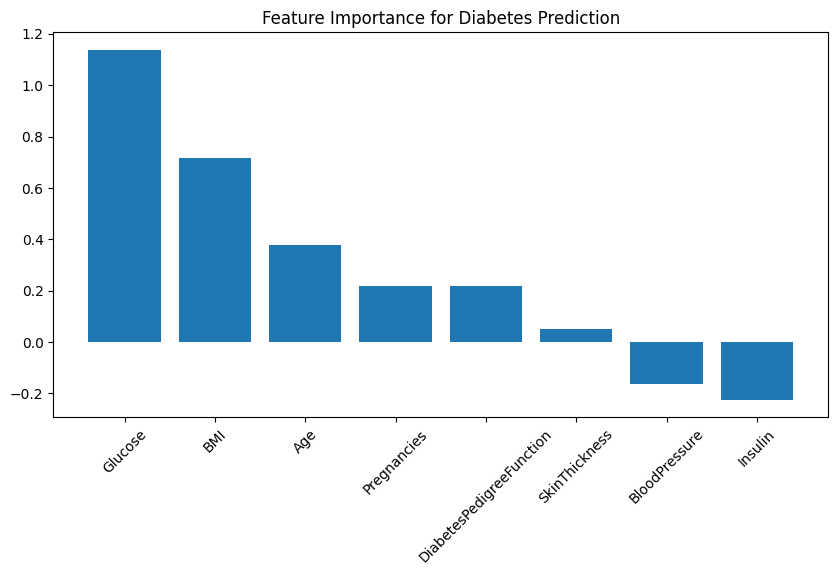

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
data = pd.read_csv('diabetes.csv')

# Basic Data Understanding
print("First 5 rows:")
print(data.head())

print("\nDataset shape:", data.shape)
print("\nBasic statistics:")
print(data.describe())

# Simple Visualization (using basic matplotlib)
plt.figure(figsize=(8, 5))
plt.hist(data['Outcome'], bins=2, rwidth=0.8)
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.title('Diabetes Distribution')
plt.show()

# Data Preprocessing
# Replace 0 values with median (simple handling of missing values)
columns_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_to_fix:
    data[col] = data[col].replace(0, data[col].median())

# Prepare features (X) and target (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data (important for many ML algorithms)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Simple Logistic Regression Model (easiest to understand)
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("\nModel Accuracy: {:.2f}%".format(accuracy * 100))

# Confusion Matrix (basic performance metric)
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)

# Simple visualization of confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix')
plt.colorbar()
plt.xticks([0, 1], ['Predicted No', 'Predicted Yes'])
plt.yticks([0, 1], ['Actual No', 'Actual Yes'])

# Add numbers to the plot
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')

plt.show()

# Feature Importance (understand which factors matter most)
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.coef_[0]
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(importance)

# Simple bar plot of feature importance
plt.figure(figsize=(10, 5))
plt.bar(importance['Feature'], importance['Importance'])
plt.title('Feature Importance for Diabetes Prediction')
plt.xticks(rotation=45)
plt.show()